AUPRC: 0.7250608288477236


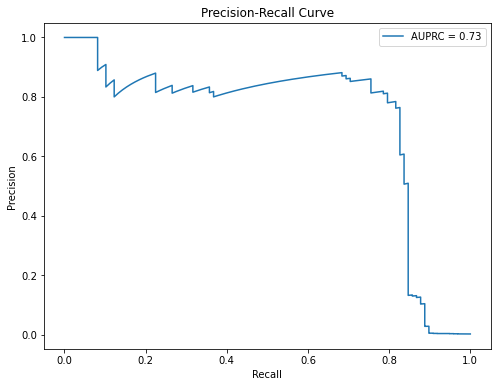

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import average_precision_score, precision_recall_curve, auc
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 加载数据
data = pd.read_csv("Data/creditcard.csv")

# 划分数据集
X = data.drop("Class", axis=1)  # 特征
y = data["Class"]  # 目标变量

# 特征缩放
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 选择支持向量机分类器
svm_classifier = SVC(kernel='linear', random_state=42)  # 选择线性核，你也可以尝试其他核函数

# 训练分类器
svm_classifier.fit(X_train, y_train)

# 预测概率
y_proba_svm = svm_classifier.decision_function(X_test)

# 计算AUPRC
precision, recall, _ = precision_recall_curve(y_test, y_proba_svm)
auprc = auc(recall, precision)

# 打印AUPRC
print("AUPRC(SVM):", auprc)

# 绘制PR曲线
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'AUPRC(SVM) = {auprc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve(SVM)')
plt.legend()
plt.show()
